In [61]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [73]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        #Convolution layers
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        #Fully connected layers
        self.fc1 = nn.Linear(in_features = 12*4*4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.fc3 = nn.Linear(in_features = 60, out_features = 10) #output layer with 10 features
        
    def forward(self, t):
        #input layer
        t = t
        
        #1st conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        #2nd conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        #Flatten the second convolution output before passing to first dense layer 
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        #2nd dense layer
        t = self.fc2(t)
        t = F.relu(t)
        
        #output layer
        t = self.fc3(t)
        #t = F.softmax(t, dim = 1) #no need to pass this if we use cross entropy loss function
        
        return t

In [74]:
train_set = torchvision.datasets.MNIST(
    root = "./data/MNIST",
    download = True,
    train = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

In [75]:
#returns the label with maximum probability
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [76]:
#instantiate the network instance
network = Network()

#load data
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 128)
optimizer = optim.Adam(network.parameters(), lr = 0.001)    

In [77]:
#plot data
batch = next(iter(train_set))
image, label = batch

In [78]:
image.shape

torch.Size([1, 28, 28])

In [79]:
#squeeze the image to remove the color channel in the shape
image.squeeze(dim=0).shape

torch.Size([28, 28])

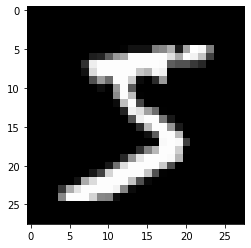

Image is:  5


In [80]:
plt.imshow(image.squeeze(dim=0), cmap = 'gray')
plt.show()
print("Image is: ", label)

In [81]:
#Training loop
for epoch in range(5):
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader:
        #get images and labels from the batch of 128 images
        images, labels = batch
        
        #get predictions
        preds = network(images)
        
        #compute the loss
        loss = F.cross_entropy(preds, labels)
        
        #zero out the gradients
        optimizer.zero_grad()
        
        #backpropagation
        loss.backward()
        
        #update the weights
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
        
    print("Epoch:", epoch, "total_correct:", total_correct, "loss:", total_loss)

Epoch: 0 total_correct: 50948 loss: 225.14531572721899
Epoch: 1 total_correct: 57666 loss: 58.806985824834555
Epoch: 2 total_correct: 58396 loss: 41.42424443899654
Epoch: 3 total_correct: 58750 loss: 32.65840468159877
Epoch: 4 total_correct: 58963 loss: 26.884370781015605


In [82]:
#calculating the accuracy
total_correct/len(train_set)

0.9827166666666667

In [29]:
#get the batch for predictions
images, labels = next(iter(train_loader))

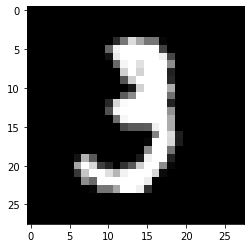

label: 3


In [30]:
#plot the image
plt.imshow(images[10].squeeze(dim=0), cmap = 'gray')
plt.show()
print("label:",label[10].item())

In [31]:
images[10].shape

torch.Size([1, 28, 28])

In [32]:
#unsqueeze the image to add a batch no. as follows
#[1, 1, 28, 28]
images[10].unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [33]:
prediction = network(images[10].unsqueeze(dim=0))

In [34]:
print(prediction)

tensor([[ -9.3504,  -1.3945,  -5.9302,  13.0131,  -6.6141,   2.2457, -19.2011,
          -2.7038,  -0.3894,   4.6278]], grad_fn=<AddmmBackward>)


In [35]:
print("Prediction:", prediction.argmax(dim=1).item())

Prediction: 3


In [36]:
images[20].unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

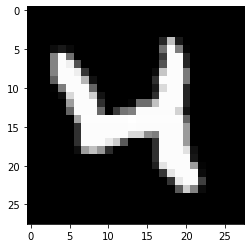

label:  4


In [46]:
plt.imshow(images[20].squeeze(dim=0), cmap='gray')
plt.show()
print("label: ",labels[20].item())

In [41]:
prediction = network(images[20].unsqueeze(dim=0))

In [42]:
print(prediction)

tensor([[-10.1765,  -7.0853,  -4.3321,  -4.0884,  13.1505,  -1.1970,  -6.7457,
          -2.3228,  -1.4012,   0.1085]], grad_fn=<AddmmBackward>)


In [43]:
print("Prediction:", prediction.argmax(dim=1).item())

Prediction: 4


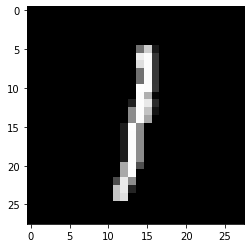

label: 1


In [56]:
plt.imshow(images[124].squeeze(dim=0), cmap='gray')
plt.show()
print("label:",labels[124].item())

In [58]:
prediction = network(images[124].unsqueeze(dim=0))

In [59]:
prediction

tensor([[-5.2372,  8.4334, -2.1238, -4.2066, -1.4167, -6.0907, -7.4964, -0.1019,
         -0.7567, -0.6456]], grad_fn=<AddmmBackward>)

In [60]:
print("Prediction: ", prediction.argmax(dim=1).item())

Prediction:  1
